In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("train.csv")
df

df.shape

df.columns

df.head()

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].median())

In [4]:
label=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=label.fit_transform(df[col])

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [6]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


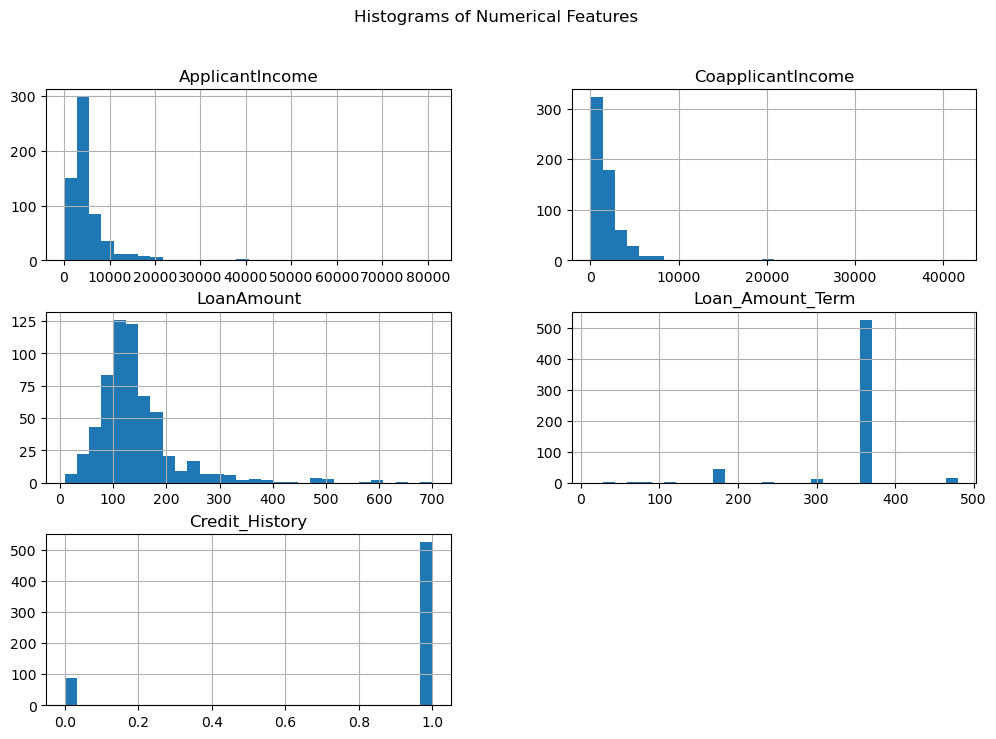

In [7]:
cat_cols = ["ApplicantIncome", "CoapplicantIncome", 
                  "LoanAmount", "Loan_Amount_Term", "Credit_History"]

df[cat_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

                    Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.028029 -0.016013    0.051559   0.039442   
Gender            -0.028029  1.000000  0.364569    0.172914   0.045364   
Married           -0.016013  0.364569  1.000000    0.334216   0.012304   
Dependents         0.051559  0.172914  0.334216    1.000000   0.055752   
Education          0.039442  0.045364  0.012304    0.055752   1.000000   
Self_Employed      0.032874 -0.000525  0.004489    0.056798  -0.010383   
ApplicantIncome    0.016925  0.058809  0.051708    0.118202  -0.140760   
CoapplicantIncome  0.039211  0.082912  0.075948    0.030430  -0.062290   
LoanAmount         0.036872  0.106904  0.146546    0.163103  -0.168759   
Loan_Amount_Term  -0.033028 -0.074030 -0.100912   -0.103864  -0.073928   
Credit_History    -0.030603  0.009170  0.010938   -0.040160  -0.073658   
Property_Area     -0.155416 -0.025752  0.004257   -0.000244  -0.065243   
Loan_Status        0.011773  0.017987 

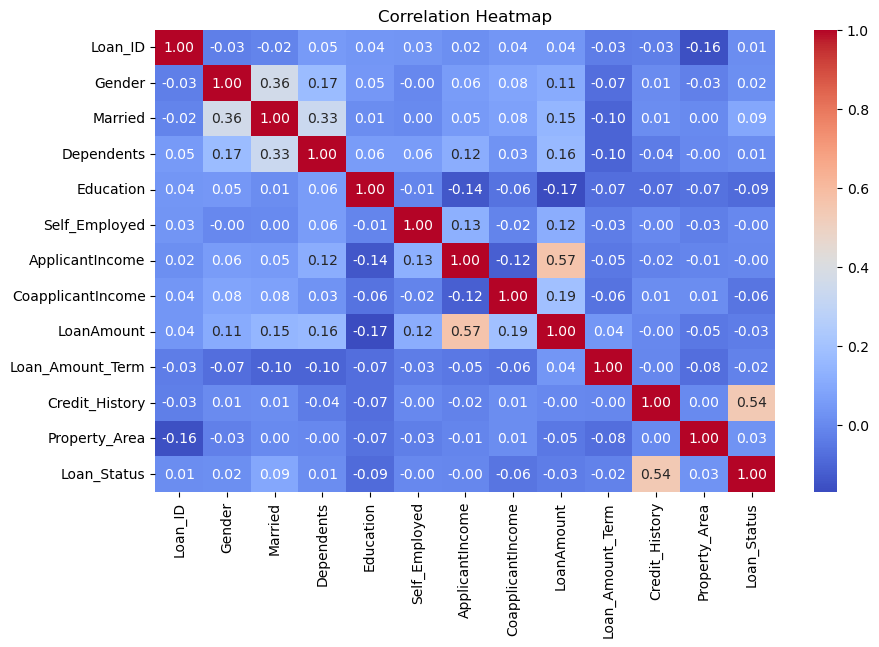

In [8]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test_scaled)
y_pred_proba=model.predict_proba(X_test_scaled)[:,1]

y_pred_proba

array([0.82588695, 0.85811001, 0.8376202 , 0.81045548, 0.75541825,
       0.86457277, 0.88154342, 0.87822382, 0.80537049, 0.86896318,
       0.15262585, 0.8285322 , 0.84555776, 0.8006215 , 0.88588032,
       0.85739612, 0.78870047, 0.67602452, 0.84790154, 0.8423417 ,
       0.87115916, 0.83157946, 0.85012687, 0.84595653, 0.8538557 ,
       0.64188663, 0.79153877, 0.74080499, 0.78868397, 0.90116227,
       0.88270029, 0.8418002 , 0.78943085, 0.78330787, 0.67709026,
       0.06569754, 0.85172932, 0.91537579, 0.86366194, 0.87764032,
       0.74738882, 0.83335957, 0.85998626, 0.84903893, 0.75834121,
       0.82182417, 0.81815154, 0.14541518, 0.10321611, 0.09126654,
       0.69588566, 0.73212882, 0.08720148, 0.71994395, 0.81731134,
       0.80353672, 0.67806277, 0.86089243, 0.12216987, 0.87783346,
       0.04602384, 0.81906306, 0.16439625, 0.83028614, 0.89278555,
       0.79685854, 0.77503603, 0.88407245, 0.90470555, 0.79200417,
       0.06928277, 0.87045856, 0.81257772, 0.8225842 , 0.10403

In [13]:
print("\nModel Evaluation:")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1score:",f1_score(y_test,y_pred))


Model Evaluation:
Accuracy: 0.7886178861788617
Precision: 0.7596153846153846
Recall: 0.9875
F1score: 0.8586956521739131


Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



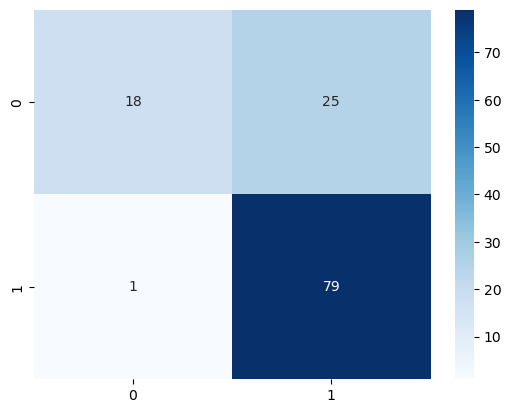

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()